<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/arbolesP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UDLA
#ISWZ3401-2626_2627-INTELIGENCIA ARTIFICIAL I


---


# Integrantes

* Kevin Coloma
* Fernando Orbe
* Martin Posso


---



# Old Code

In [ ]:
#cálculo numérico y análisis de datos
import numpy as np
#manipulación y análisis de datos (estructuras de datos)
import pandas as pd

quemadura_data = pd.read_csv("arbQuemadura.csv", index_col=0)
quemadura_data.head()


FileNotFoundError: ignored

In [ ]:
#caluclar la entropia
def calcular_entropia(p):
    return -np.sum(p*np.log2(p))
#contar las clases del arbol
valores, cuantos = np.unique(quemadura_data['Quemadura'], return_counts=True)
entropia = calcular_entropia(cuantos/sum(cuantos))
print("Entropia del arbol",entropia)
valores,cuantos

Entropia del arbol 0.9544340029249649


(array(['no', 'si'], dtype=object), array([5, 3]))

In [ ]:
#calcular la ganancia
def calcular_ganancia(valores, var='Pelo'):

    valores, cuantos = np.unique(quemadura_data[var],return_counts=True)
    #genero una lista para calcular la ganancia
    info_A = []

    for e in valores:
        se = np.where(quemadura_data[var]==e)
        print("tiene se",se)
        #particiona por valor
        se_quemadura = quemadura_data['Quemadura'][quemadura_data.index[se[0]]]
        print("se_quemadura",se_quemadura)
        #valores por subgrupo
        v_se_quemadura, c_se_quemadura = np.unique(se_quemadura,return_counts=True)
        print("subgrupos ",v_se_quemadura,c_se_quemadura)
        #entropia del valor
        se_entropia = abs(calcular_entropia(c_se_quemadura/sum(c_se_quemadura)))
        print("se_entropia",se_entropia)
        #probabilidad del valor
        se_size = sum(c_se_quemadura)/len(quemadura_data.index)
        print("probabilidad valor",se_size)
        #almacenar valores
        info_A += [[se_entropia, se_size]]
        print("info_A",info_A)
    #convertir lista en arreglo
    info_A = np.array(info_A)
    #calcular la entropia de la variable
    info_g = np.sum(info_A[:,0]*info_A[:,1])
    print("info_g",info_g)
    return info_g

info_A= calcular_ganancia(valores, var='Pelo')
ganancia = entropia - info_A
print("ganancia de pelo",ganancia)









tiene se (array([2, 5, 6]),)
se_quemadura 2    no
5    no
6    no
Name: Quemadura, dtype: object
subgrupos  ['no'] [3]
se_entropia 0.0
probabilidad valor 0.375
info_A [[0.0, 0.375]]
tiene se (array([4]),)
se_quemadura 4    si
Name: Quemadura, dtype: object
subgrupos  ['si'] [1]
se_entropia 0.0
probabilidad valor 0.125
info_A [[0.0, 0.375], [0.0, 0.125]]
tiene se (array([0, 1, 3, 7]),)
se_quemadura 0    si
1    no
3    si
7    no
Name: Quemadura, dtype: object
subgrupos  ['no' 'si'] [2 2]
se_entropia 1.0
probabilidad valor 0.5
info_A [[0.0, 0.375], [0.0, 0.125], [1.0, 0.5]]
info_g 0.5
ganancia de pelo 0.45443400292496494


In [ ]:
#altura
info_A= calcular_ganancia(valores, var='Altura')
ganancia = entropia - info_A
print("ganancia de altura",ganancia)

tiene se (array([1, 5]),)
se_quemadura 1    no
5    no
Name: Quemadura, dtype: object
subgrupos  ['no'] [2]
se_entropia 0.0
probabilidad valor 0.25
info_A [[0.0, 0.25]]
tiene se (array([2, 3, 7]),)
se_quemadura 2    no
3    si
7    no
Name: Quemadura, dtype: object
subgrupos  ['no' 'si'] [2 1]
se_entropia 0.9182958340544896
probabilidad valor 0.375
info_A [[0.0, 0.25], [0.9182958340544896, 0.375]]
tiene se (array([0, 4, 6]),)
se_quemadura 0    si
4    si
6    no
Name: Quemadura, dtype: object
subgrupos  ['no' 'si'] [1 2]
se_entropia 0.9182958340544896
probabilidad valor 0.375
info_A [[0.0, 0.25], [0.9182958340544896, 0.375], [0.9182958340544896, 0.375]]
info_g 0.6887218755408672
ganancia de altura 0.2657121273840978


In [ ]:
#ganancia de peso
info_A= calcular_ganancia(valores, var='Peso')
ganancia = entropia - info_A
print("ganancia de peso",ganancia)

tiene se (array([4, 5, 6]),)
se_quemadura 4    si
5    no
6    no
Name: Quemadura, dtype: object
subgrupos  ['no' 'si'] [2 1]
se_entropia 0.9182958340544896
probabilidad valor 0.375
info_A [[0.9182958340544896, 0.375]]
tiene se (array([0, 7]),)
se_quemadura 0    si
7    no
Name: Quemadura, dtype: object
subgrupos  ['no' 'si'] [1 1]
se_entropia 1.0
probabilidad valor 0.25
info_A [[0.9182958340544896, 0.375], [1.0, 0.25]]
tiene se (array([1, 2, 3]),)
se_quemadura 1    no
2    no
3    si
Name: Quemadura, dtype: object
subgrupos  ['no' 'si'] [2 1]
se_entropia 0.9182958340544896
probabilidad valor 0.375
info_A [[0.9182958340544896, 0.375], [1.0, 0.25], [0.9182958340544896, 0.375]]
info_g 0.9387218755408671
ganancia de peso 0.015712127384097885


In [ ]:
info_A= calcular_ganancia(valores, var='Proteccion')
ganancia = entropia - info_A
print("ganancia de proteccion",ganancia)

tiene se (array([0, 3, 4, 5, 6]),)
se_quemadura 0    si
3    si
4    si
5    no
6    no
Name: Quemadura, dtype: object
subgrupos  ['no' 'si'] [2 3]
se_entropia 0.9709505944546686
probabilidad valor 0.625
info_A [[0.9709505944546686, 0.625]]
tiene se (array([1, 2, 7]),)
se_quemadura 1    no
2    no
7    no
Name: Quemadura, dtype: object
subgrupos  ['no'] [3]
se_entropia 0.0
probabilidad valor 0.375
info_A [[0.9709505944546686, 0.625], [0.0, 0.375]]
info_g 0.6068441215341679
ganancia de proteccion 0.34758988139079705


In [ ]:
#utilizando la librería sklearn

from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()
le = preprocessing.LabelEncoder()
var = ["Pelo","Altura","Peso","Proteccion","Quemadura"]

for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

clf = clf.fit(t_data, t_target)
t_data, t_target,clf




(   Pelo  Altura  Peso  Proteccion
 0     2       2     1           0
 1     2       0     2           1
 2     0       1     2           1
 3     2       1     2           0
 4     1       2     0           0
 5     0       0     0           0
 6     0       2     0           0
 7     2       1     1           1, 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 7    0
 Name: Quemadura, dtype: int64, DecisionTreeClassifier(criterion='entropy', max_depth=4))

# New Code for solution

## Libraries

In [ ]:
import numpy as np
import pandas as pd

### libraries for sklearn (testing purposes)

In [ ]:
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Load Data

In [ ]:
quemadura_data = pd.read_csv('/content/sample_data/arbQuemadura.csv')
quemadura_data

,Ejemplo,Pelo,Altura,Peso,Proteccion,Quemadura
0,1,rubio,medio,bajo,no,si
1,2,rubio,alto,medio,si,no
2,3,moreno,bajo,medio,si,no
3,4,rubio,bajo,medio,no,si
4,5,rojo,medio,alto,no,si
5,6,moreno,alto,alto,no,no
6,7,moreno,medio,alto,no,no
7,8,rubio,bajo,bajo,si,no


## Preprocessing for Sklearn

In [ ]:
df = quemadura_data.copy()

#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = df.columns[1:-1]

data = df.copy()

for v in var:
    le.fit(df[v])
    data[v] = le.transform(df[v])

data

,Ejemplo,Pelo,Altura,Peso,Proteccion,Quemadura
0,1,2,2,1,0,si
1,2,2,0,2,1,no
2,3,0,1,2,1,no
3,4,2,1,2,0,si
4,5,1,2,0,0,si
5,6,0,0,0,0,no
6,7,0,2,0,0,no
7,8,2,1,1,1,no


## Model Fitting

In [ ]:
explicativas = data.drop(columns=['Ejemplo', 'Quemadura'])
Objetivo = data['Quemadura']

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')

model.fit(X=explicativas, y=Objetivo)

DecisionTreeClassifier(criterion='entropy')

## Model Visualization

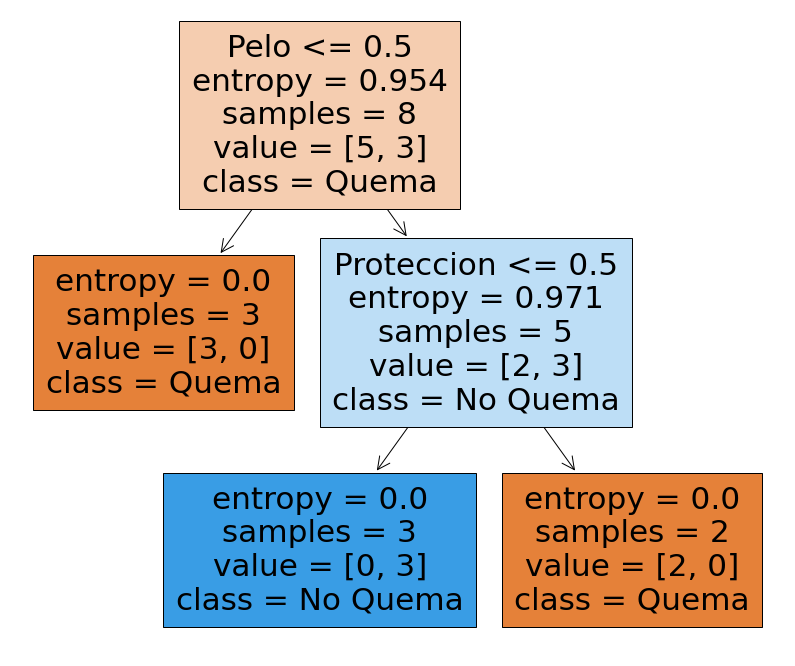

In [ ]:
plt.figure(figsize=(14, 12))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, class_names=['Quema', 'No Quema']);

## Functions declarations

In [ ]:
#compute entropy

def calcular_entropia(p):
  return -np.sum(p * np.log2(p))

# Calculate

#calcular la ganancia
def calcular_ganancia(var= 'Pelo', next_node = None):

    cuantos = quemadura_data[var].value_counts()
    valores = cuantos.keys()
    #genero una lista para calcular la ganancia
    info_A = []

    for e in valores:

        se = np.where(quemadura_data[var] == e)

        #particiona por valor
        se_quemadura = quemadura_data['Quemadura'][quemadura_data.index[se[0]]]

        #valores por subgrupo

        c_se_quemadura = se_quemadura.value_counts()
        v_se_quemadura = c_se_quemadura.keys()

        #entropia del valor
        se_entropia = abs(calcular_entropia(c_se_quemadura/sum(c_se_quemadura)))

        #probabilidad del valor
        se_size = sum(c_se_quemadura)/len(quemadura_data.index)

        #almacenar valores
        info_A += [[se_entropia, se_size]]

        if (len(v_se_quemadura) == 1):
          if('no' in v_se_quemadura):
            print('\nNodo evaluado: ', e + ' ---> Clase: no quema')
          else:
            print('\nNodo evaluado: ', e + ' ---> Clase: si quema')
        else:
          print('\n\t• De: ' + e)
          print('\t\t~ Siguiente nodo: ', next_node + '\n')

        print('\t• Value: ', c_se_quemadura.to_dict())
        print('\t• Sample: ', c_se_quemadura.sum())
        print('\t• Entropia: ', se_entropia)
        print('\t• Size: ', se_entropia)
        #print('\t'v_se_quemadura)

    #convertir lista en arreglo
    info_A = np.array(info_A)
    #calcular la entropia de la variable
    info_g = np.sum(info_A[:,0]*info_A[:,1])
    return info_g

## Calculate Entropy

In [ ]:
entropy_valores = quemadura_data['Quemadura'].value_counts()

#normalize data
norm_valores = entropy_valores / entropy_valores.sum()

entropia = calcular_entropia(norm_valores)

print('Entropia del Arbol: ', entropia)
print('Valores contados: ')
print(entropy_valores)
print('Valores Normalizados: ')
print(norm_valores)


Entropia del Arbol:  0.9544340029249649
Valores contados: 
no    5
si    3
Name: Quemadura, dtype: int64
Valores Normalizados: 
no    0.625
si    0.375
Name: Quemadura, dtype: float64


## Individual Profit

> * Ejemplo con atributo 'Pelo'

In [ ]:
nodo = 'Pelo'
print('Nodo: ', nodo)
print('_____________________')

info_a = calcular_ganancia(var= 'Pelo', next_node = '')

entropy_values = quemadura_data['Quemadura'].value_counts()
#normalize data
norm_values = entropy_values / entropy_values.sum()

entropy = calcular_entropia(norm_values)


ganancia = entropy - info_a

#Printing Values

print("\n• Entropia: ", info_a)
print('• Ganancia: ', ganancia)

print('_____________________')

Nodo:  Pelo
_____________________

	• De: rubio
		~ Siguiente nodo:  

	• Value:  {'si': 2, 'no': 2}
	• Sample:  4
	• Entropia:  1.0
	• Size:  1.0

Nodo evaluado:  moreno ---> Clase: no quema
	• Value:  {'no': 3}
	• Sample:  3
	• Entropia:  0.0
	• Size:  0.0

Nodo evaluado:  rojo ---> Clase: si quema
	• Value:  {'si': 1}
	• Sample:  1
	• Entropia:  0.0
	• Size:  0.0

• Entropia:  0.5
• Ganancia:  0.45443400292496494
_____________________


## Calculate Profit of all columns on our dataframe

In [ ]:
var = quemadura_data.keys()
incomes = {}

for v in var[1:-1]:
  print('Nodo: ', v)
  print('_____________________')

  info_a = calcular_ganancia(var= v, next_node = '')

  entropy_values = quemadura_data['Quemadura'].value_counts()
  #normalize data
  norm_values = entropy_values / entropy_values.sum()

  entropy = calcular_entropia(norm_values)


  ganancia = entropy - info_a
  incomes[v] = ganancia

  #Printing Values

  print("\n• Entropia: ", info_a)
  print('• Ganancia: ', ganancia)

  print('_____________________')

max_income = max(incomes, key=incomes.get)


print('Ganancias ---->: ', incomes)
print('Nodo Importante: ', max_income)

Nodo:  Pelo
_____________________

	• De: rubio
		~ Siguiente nodo:  

	• Value:  {'si': 2, 'no': 2}
	• Sample:  4
	• Entropia:  1.0
	• Size:  1.0

Nodo evaluado:  moreno ---> Clase: no quema
	• Value:  {'no': 3}
	• Sample:  3
	• Entropia:  0.0
	• Size:  0.0

Nodo evaluado:  rojo ---> Clase: si quema
	• Value:  {'si': 1}
	• Sample:  1
	• Entropia:  0.0
	• Size:  0.0

• Entropia:  0.5
• Ganancia:  0.45443400292496494
_____________________
Nodo:  Altura
_____________________

	• De: medio
		~ Siguiente nodo:  

	• Value:  {'si': 2, 'no': 1}
	• Sample:  3
	• Entropia:  0.9182958340544896
	• Size:  0.9182958340544896

	• De: bajo
		~ Siguiente nodo:  

	• Value:  {'no': 2, 'si': 1}
	• Sample:  3
	• Entropia:  0.9182958340544896
	• Size:  0.9182958340544896

Nodo evaluado:  alto ---> Clase: no quema
	• Value:  {'no': 2}
	• Sample:  2
	• Entropia:  0.0
	• Size:  0.0

• Entropia:  0.6887218755408672
• Ganancia:  0.2657121273840978
_____________________
Nodo:  Peso
_____________________

	• De

## We calculate our decision tree using the profits we got above

In [ ]:
sorted_list = sorted(incomes.items(), key=lambda x: (x[1], x[0]), reverse=True)

for i, j in sorted_list:
  print('Nodo: ', i)
  print('_____________________')

  info_a = calcular_ganancia(var= i, next_node = sorted_list[sorted_list.index((i, j)) - len(sorted_list) + 1][0])

  entropy_values = quemadura_data['Quemadura'].value_counts()
  #normalize data
  norm_values = entropy_values / entropy_values.sum()

  entropy = calcular_entropia(norm_values)


  ganancia = entropy - info_a
  incomes[v] = ganancia

  #Printing Values

  print("\n• Entropia: ", info_a)
  print('• Ganancia: ', ganancia)

  print('_____________________')


Nodo:  Pelo
_____________________

	• De: rubio
		~ Siguiente nodo:  Proteccion

	• Value:  {'si': 2, 'no': 2}
	• Sample:  4
	• Entropia:  1.0
	• Size:  1.0

Nodo evaluado:  moreno ---> Clase: no quema
	• Value:  {'no': 3}
	• Sample:  3
	• Entropia:  0.0
	• Size:  0.0

Nodo evaluado:  rojo ---> Clase: si quema
	• Value:  {'si': 1}
	• Sample:  1
	• Entropia:  0.0
	• Size:  0.0

• Entropia:  0.5
• Ganancia:  0.45443400292496494
_____________________
Nodo:  Proteccion
_____________________

	• De: no 
		~ Siguiente nodo:  Altura

	• Value:  {'si': 3, 'no': 2}
	• Sample:  5
	• Entropia:  0.9709505944546686
	• Size:  0.9709505944546686

Nodo evaluado:  si ---> Clase: no quema
	• Value:  {'no': 3}
	• Sample:  3
	• Entropia:  0.0
	• Size:  0.0

• Entropia:  0.6068441215341679
• Ganancia:  0.34758988139079705
_____________________
Nodo:  Altura
_____________________

	• De: medio
		~ Siguiente nodo:  Peso

	• Value:  {'si': 2, 'no': 1}
	• Sample:  3
	• Entropia:  0.9182958340544896
	• Size:  0